## Telecom Churn Case Study

#### - Business Problem :
    - In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators.
    - In this case study we will build an ML model which can predict if the customer will churn or not in a particular month based on the past data.
    
    
#### - Below are the steps which will be followed : 
    - Data Understanding, Preparation, and Pre-Processing 
    - Exploratory Data Analysis
    - Feature Engineering and Variable Transformation
    - Model Selection, Model Building, and  Prediction 

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [2]:
telecom_data = pd.read_csv("/Users/ashutosh/UG/Case_Study_Kaggle/train.csv")

# lets look at initial rows of the data
telecom_data.head(10)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.00,0.00,0.00,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.00,0.00,0.00,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.00,0.00,0.00,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.00,0.00,0.00,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.00,0.00,0.00,0
5,5,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,86.193,83.351,...,0,0,NaN,NaN,NaN,698,0.00,0.00,0.00,0
6,6,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,54.173,95.130,...,0,0,NaN,NaN,NaN,1083,0.00,0.00,0.00,0
7,7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,167.861,167.869,...,0,0,1.0,1.0,1.0,584,82.26,73.56,177.14,0
8,8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,163.550,90.250,...,0,0,NaN,NaN,NaN,2455,0.00,0.00,0.00,1
9,9,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,101.984,259.265,...,0,0,NaN,NaN,NaN,2530,0.00,0.00,0.00,0


In [3]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


As we can see we have intotal of 172 columns which contains different types of data.

In [4]:
# lets understand the structure of telecom dataset

telecom_data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


In [5]:
telecom_data.shape

(69999, 172)

### Let's handle the missing values in our dataset

In [6]:
# lets check the number of missing values and its percentage

# Cheking percent of missing values in columns
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null_values')).sort_values('null_values', ascending=False)
telecom_data_missing_columns

,null_values
arpu_3g_6,74.9
count_rech_2g_6,74.9
night_pck_user_6,74.9
arpu_2g_6,74.9
date_of_last_rech_data_6,74.9
...,...
last_day_rch_amt_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0
vol_2g_mb_8,0.0


In [7]:
# lets list the columns having more than 50% missing values
col_list_missing_50 = list(telecom_data_missing_columns.index[telecom_data_missing_columns['null_values'] > 50])

In [8]:
col_list_missing_50

['arpu_3g_6',
 'count_rech_2g_6',
 'night_pck_user_6',
 'arpu_2g_6',
 'date_of_last_rech_data_6',
 'total_rech_data_6',
 'av_rech_amt_data_6',
 'max_rech_data_6',
 'count_rech_3g_6',
 'fb_user_6',
 'night_pck_user_7',
 'date_of_last_rech_data_7',
 'total_rech_data_7',
 'max_rech_data_7',
 'fb_user_7',
 'count_rech_2g_7',
 'count_rech_3g_7',
 'arpu_3g_7',
 'av_rech_amt_data_7',
 'arpu_2g_7',
 'count_rech_2g_8',
 'av_rech_amt_data_8',
 'night_pck_user_8',
 'max_rech_data_8',
 'total_rech_data_8',
 'arpu_2g_8',
 'arpu_3g_8',
 'date_of_last_rech_data_8',
 'fb_user_8',
 'count_rech_3g_8']

In [9]:
# Delete the columns having more than 50% missing values
telecom_data = telecom_data.drop(col_list_missing_50, axis=1)

In [10]:
telecom_data.shape

(69999, 142)

### Deleting the date columns as the date columns are not required in our analysis


In [11]:
# List the date columns
date_cols = [k for k in telecom_data.columns.to_list() if 'date' in k]
print(date_cols) 

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [12]:
# Dropping date columns
telecom_data = telecom_data.drop(date_cols, axis=1)

In [13]:
telecom_data.shape

(69999, 136)

### Filter high-value customers


In [14]:
# List the recharge columns
rech_cols = [k for k in telecom_data.columns.to_list() if 'rech' in k]
print(rech_cols) 

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']


Creating column avg_rech_amt_6_7_8 by summing up total recharge amount of month 6, 7 and 8. Then taking the average of the sum.

In [15]:
telecom_data['avg_rech_amt_6_7_8'] = (telecom_data['total_rech_amt_6'] + telecom_data['total_rech_amt_7'] + telecom_data['total_rech_amt_8'])/3

Let's find the 60th percentile of the avg_rech_amt_6_7_8

In [16]:
telecom_data_avg_rech_60 = telecom_data['avg_rech_amt_6_7_8'].quantile(0.6)
telecom_data_avg_rech_60

289.3333333333333

Filter the customers, who have recharged more than or equal to telecom_data_avg_rech_60.

In [17]:
telecom_data = telecom_data[telecom_data['avg_rech_amt_6_7_8'] >= telecom_data_avg_rech_60]
telecom_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7_8
11,11,109,0.0,0.0,0.0,292.724,228.753,418.233,135.54,63.61,...,0,0,0,0,648,0.0,0.0,0.0,0,363.333333
12,12,109,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,...,0,0,0,0,322,0.0,0.0,0.0,0,434.666667
14,14,109,0.0,0.0,0.0,340.266,205.397,191.780,123.76,116.34,...,0,0,0,0,1049,0.0,0.0,0.0,0,333.333333
15,15,109,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,...,0,0,0,0,602,0.0,0.0,0.0,0,568.666667
22,22,109,0.0,0.0,0.0,277.458,283.346,231.755,179.54,287.98,...,0,0,0,0,2837,0.0,0.0,0.0,0,353.000000


In [18]:
telecom_data.shape

(28004, 137)

We can see that we have around ~28k rows after filtering

### Handling missing values in ROWS


In [19]:
# Count the rows having more than 50% missing values
telecom_data_missing_rows_50 = telecom_data[(telecom_data.isnull().sum(axis=1)) > (len(telecom_data.columns)//2)]
telecom_data_missing_rows_50.shape

(99, 137)

In [20]:
# Deleting the rows having more than 50% missing values
telecom_data = telecom_data.drop(telecom_data_missing_rows_50.index)
telecom_data.shape

(27905, 137)

In [21]:
# Checking the missing values in columns again
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null_values')).sort_values('null_values', ascending=False)
telecom_data_missing_columns

,null_values
spl_og_mou_8,1.65
loc_ic_t2t_mou_8,1.65
std_og_t2c_mou_8,1.65
loc_ic_mou_8,1.65
loc_og_t2m_mou_8,1.65
...,...
total_rech_amt_8,0.00
max_rech_amt_6,0.00
max_rech_amt_7,0.00
max_rech_amt_8,0.00


Looks like MOU for all the types of calls for the month of August (8) have missing values together for any particular record.

Lets check the records for the MOU for Aug (8), in which these coulmns have missing values together.

In [22]:
print(list(telecom_data_missing_columns.index[telecom_data_missing_columns['null_values'] >= 1.65]))

['spl_og_mou_8', 'loc_ic_t2t_mou_8', 'std_og_t2c_mou_8', 'loc_ic_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'roam_og_mou_8', 'og_others_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'isd_og_mou_8', 'std_og_t2m_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'loc_og_t2t_mou_8', 'std_ic_mou_8', 'std_ic_t2o_mou_8', 'ic_others_8', 'isd_ic_mou_8', 'spl_ic_mou_8', 'std_ic_t2m_mou_8', 'onnet_mou_8', 'std_og_t2f_mou_8', 'roam_ic_mou_8', 'std_ic_t2f_mou_8', 'offnet_mou_8']


In [23]:
# Creating a dataframe with the condition, in which MOU for Aug (8) are null

telecom_data_null_mou_8 = telecom_data[(telecom_data['spl_og_mou_8'].isnull()) & (telecom_data['loc_ic_t2t_mou_8'].isnull()) & (telecom_data['std_og_t2c_mou_8'].isnull()) & (telecom_data['loc_ic_mou_8'].isnull()) & (telecom_data['loc_og_t2m_mou_8'].isnull()) & (telecom_data['loc_ic_t2f_mou_8'].isnull()) & (telecom_data['loc_ic_t2m_mou_8'].isnull()) & (telecom_data['loc_og_t2f_mou_8'].isnull()) & (telecom_data['loc_og_t2c_mou_8'].isnull()) & (telecom_data['roam_og_mou_8'].isnull()) & (telecom_data['og_others_8'].isnull()) & (telecom_data['loc_og_mou_8'].isnull()) & (telecom_data['std_og_t2t_mou_8'].isnull()) & (telecom_data['isd_og_mou_8'].isnull()) & (telecom_data['std_og_t2m_mou_8'].isnull()) & (telecom_data['std_og_mou_8'].isnull()) & (telecom_data['std_ic_t2t_mou_8'].isnull()) & (telecom_data['loc_og_t2t_mou_8'].isnull()) & (telecom_data['std_ic_mou_8'].isnull()) & (telecom_data['std_ic_t2o_mou_8'].isnull()) & (telecom_data['ic_others_8'].isnull()) & (telecom_data['isd_ic_mou_8'].isnull()) & (telecom_data['spl_ic_mou_8'].isnull()) & (telecom_data['std_ic_t2m_mou_8'].isnull()) & (telecom_data['onnet_mou_8'].isnull()) & (telecom_data['std_og_t2f_mou_8'].isnull()) & (telecom_data['roam_ic_mou_8'].isnull()) & (telecom_data['std_ic_t2f_mou_8'].isnull()) & (telecom_data['offnet_mou_8'].isnull())]

telecom_data_null_mou_8.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7_8
177,177,109,0.0,0.0,0.0,596.301,146.073,0.000,55.19,3.26,...,0,1,0,0,332,0.0,0.0,0.00,1,294.000000
183,183,109,0.0,0.0,0.0,263.340,806.465,0.000,211.89,119.89,...,0,0,0,0,3052,0.0,0.0,99.46,1,399.666667
491,491,109,0.0,0.0,0.0,1748.607,1172.416,0.000,3709.38,2343.29,...,0,0,0,0,1209,0.0,0.0,0.00,1,1138.000000
704,704,109,0.0,0.0,0.0,246.967,205.859,274.383,0.00,0.00,...,0,7,7,8,410,0.0,0.0,30.28,0,289.666667
930,930,109,0.0,0.0,0.0,579.085,365.522,0.000,26.51,16.29,...,0,0,0,0,320,0.0,0.0,0.00,1,354.000000


In [24]:
telecom_data_null_mou_8.shape

(461, 137)

In [25]:
# Deleting the records for which MOU for Aug (8) are null
telecom_data = telecom_data.drop(telecom_data_null_mou_8.index)

In [26]:
# Again Cheking percent of missing values in columns
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null_values')).sort_values('null_values', ascending=False)
telecom_data_missing_columns

,null_values
loc_ic_t2f_mou_6,1.37
og_others_6,1.37
loc_og_t2c_mou_6,1.37
loc_og_mou_6,1.37
std_og_t2t_mou_6,1.37
...,...
total_og_mou_7,0.00
total_og_mou_6,0.00
og_others_8,0.00
spl_og_mou_8,0.00


Looks like MOU for all the types of calls for the month of June (6) have missing values together for any particular record.

Lets check the records for the MOU for June (6) , in which these coulmns have missing values together.

In [27]:
print(list(telecom_data_missing_columns.index[telecom_data_missing_columns['null_values'] >= 1.37]))

['loc_ic_t2f_mou_6', 'og_others_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_t2c_mou_6', 'isd_ic_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_t2o_mou_6', 'std_ic_mou_6', 'ic_others_6', 'spl_ic_mou_6', 'loc_og_t2f_mou_6', 'std_og_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'offnet_mou_6', 'loc_og_t2t_mou_6', 'onnet_mou_6']


In [28]:
# Creating a dataframe with the condition, in which MOU for June (6) are null

telecom_data_null_mou_6 = telecom_data[(telecom_data['spl_og_mou_6'].isnull()) & (telecom_data['loc_ic_t2t_mou_6'].isnull()) & (telecom_data['std_og_t2c_mou_6'].isnull()) & (telecom_data['loc_ic_mou_6'].isnull()) & (telecom_data['loc_og_t2m_mou_6'].isnull()) & (telecom_data['loc_ic_t2f_mou_6'].isnull()) & (telecom_data['loc_ic_t2m_mou_6'].isnull()) & (telecom_data['loc_og_t2f_mou_6'].isnull()) & (telecom_data['loc_og_t2c_mou_6'].isnull()) & (telecom_data['roam_og_mou_6'].isnull()) & (telecom_data['og_others_6'].isnull()) & (telecom_data['loc_og_mou_6'].isnull()) & (telecom_data['std_og_t2t_mou_6'].isnull()) & (telecom_data['isd_og_mou_6'].isnull()) & (telecom_data['std_og_t2m_mou_6'].isnull()) & (telecom_data['std_og_mou_6'].isnull()) & (telecom_data['std_ic_t2t_mou_6'].isnull()) & (telecom_data['loc_og_t2t_mou_6'].isnull()) & (telecom_data['std_ic_mou_6'].isnull()) & (telecom_data['std_ic_t2o_mou_6'].isnull()) & (telecom_data['ic_others_6'].isnull()) & (telecom_data['isd_ic_mou_6'].isnull()) & (telecom_data['spl_ic_mou_6'].isnull()) & (telecom_data['std_ic_t2m_mou_6'].isnull()) & (telecom_data['onnet_mou_6'].isnull()) & (telecom_data['std_og_t2f_mou_6'].isnull()) & (telecom_data['roam_ic_mou_6'].isnull()) & (telecom_data['std_ic_t2f_mou_6'].isnull()) & (telecom_data['offnet_mou_6'].isnull())]

telecom_data_null_mou_6.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7_8
135,135,109,0.0,0.0,0.0,0.000,482.035,718.352,NaN,4.04,...,0,0,0,1,614,0.0,31.60,0.0,0,460.666667
312,312,109,0.0,0.0,0.0,0.000,291.909,679.600,NaN,431.79,...,0,0,0,0,485,0.0,98.03,0.0,0,408.666667
599,599,109,0.0,0.0,0.0,726.813,726.788,438.050,NaN,NaN,...,1,0,0,0,451,0.0,0.00,0.0,0,738.333333
1095,1095,109,0.0,0.0,0.0,0.000,347.059,752.212,NaN,488.44,...,0,0,0,0,2236,0.0,0.00,0.0,0,423.000000
1410,1410,109,0.0,0.0,0.0,0.000,315.423,523.680,NaN,124.96,...,0,0,0,0,1159,0.0,0.00,0.0,0,320.666667


In [29]:
telecom_data_null_mou_6.shape

(376, 137)

In [30]:
# Deleting the records for which MOU for June (6) are null
telecom_data = telecom_data.drop(telecom_data_null_mou_6.index)

In [31]:
# Again Cheking percent of missing values in columns
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null_values')).sort_values('null_values', ascending=False)
telecom_data_missing_columns

,null_values
std_ic_t2f_mou_7,0.21
roam_og_mou_7,0.21
loc_ic_t2t_mou_7,0.21
loc_og_t2m_mou_7,0.21
spl_ic_mou_7,0.21
...,...
std_og_mou_6,0.00
std_og_t2c_mou_8,0.00
std_og_t2c_mou_6,0.00
std_og_t2f_mou_8,0.00


Looks like MOU for all the types of calls for the month of July (7) have missing values together for any particular record.

Lets check the records for the MOU for July (7) , in which these coulmns have missing values together.

In [32]:
print(list(telecom_data_missing_columns.index[telecom_data_missing_columns['null_values'] >= 0.21]))

['std_ic_t2f_mou_7', 'roam_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'spl_ic_mou_7', 'loc_og_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2c_mou_7', 'og_others_7', 'loc_og_mou_7', 'spl_og_mou_7', 'std_og_t2t_mou_7', 'ic_others_7', 'std_og_t2m_mou_7', 'isd_og_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'loc_og_t2t_mou_7', 'std_og_t2c_mou_7', 'loc_ic_t2f_mou_7', 'offnet_mou_7', 'std_ic_t2o_mou_7', 'onnet_mou_7', 'std_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'roam_ic_mou_7', 'std_ic_t2m_mou_7', 'loc_ic_t2m_mou_7']


In [33]:
# Creating a dataframe with the condition, in which MOU for July (7) are null

telecom_data_null_mou_7 = telecom_data[(telecom_data['spl_og_mou_7'].isnull()) & (telecom_data['loc_ic_t2t_mou_7'].isnull()) & (telecom_data['std_og_t2c_mou_7'].isnull()) & (telecom_data['loc_ic_mou_7'].isnull()) & (telecom_data['loc_og_t2m_mou_7'].isnull()) & (telecom_data['loc_ic_t2f_mou_7'].isnull()) & (telecom_data['loc_ic_t2m_mou_7'].isnull()) & (telecom_data['loc_og_t2f_mou_7'].isnull()) & (telecom_data['loc_og_t2c_mou_7'].isnull()) & (telecom_data['roam_og_mou_7'].isnull()) & (telecom_data['og_others_7'].isnull()) & (telecom_data['loc_og_mou_7'].isnull()) & (telecom_data['std_og_t2t_mou_7'].isnull()) & (telecom_data['isd_og_mou_7'].isnull()) & (telecom_data['std_og_t2m_mou_7'].isnull()) & (telecom_data['std_og_mou_7'].isnull()) & (telecom_data['std_ic_t2t_mou_7'].isnull()) & (telecom_data['loc_og_t2t_mou_7'].isnull()) & (telecom_data['std_ic_mou_7'].isnull()) & (telecom_data['std_ic_t2o_mou_7'].isnull()) & (telecom_data['ic_others_7'].isnull()) & (telecom_data['isd_ic_mou_7'].isnull()) & (telecom_data['spl_ic_mou_7'].isnull()) & (telecom_data['std_ic_t2m_mou_7'].isnull()) & (telecom_data['onnet_mou_7'].isnull()) & (telecom_data['std_og_t2f_mou_7'].isnull()) & (telecom_data['roam_ic_mou_7'].isnull()) & (telecom_data['std_ic_t2f_mou_7'].isnull()) & (telecom_data['offnet_mou_7'].isnull())]

telecom_data_null_mou_7.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7_8
1054,1054,109,0.0,0.0,0.0,903.979,0.000,317.133,181.98,NaN,...,0,0,0,0,966,0.00,0.00,0.00,0,459.000000
1158,1158,109,0.0,0.0,0.0,130.347,0.000,891.310,4.01,NaN,...,0,0,0,0,1364,0.00,0.00,0.00,0,511.000000
1404,1404,109,0.0,0.0,0.0,254.142,426.744,305.578,1.40,NaN,...,1,0,0,0,566,77.44,36.73,9.21,0,399.666667
1641,1641,109,0.0,0.0,0.0,973.728,0.000,244.360,178.84,NaN,...,0,0,0,0,3370,0.00,0.00,0.00,0,416.666667
2136,2136,109,0.0,0.0,0.0,157.457,130.646,556.672,0.00,NaN,...,2,0,0,0,297,122.84,0.00,1.77,0,304.000000


In [34]:
telecom_data_null_mou_7.shape

(56, 137)

In [35]:
# Deleting the records for which MOU for july (7) are null
telecom_data = telecom_data.drop(telecom_data_null_mou_7.index)

In [36]:
# Again Cheking percent of missing values in columns
telecom_data_missing_columns = (round(((telecom_data.isnull().sum()/len(telecom_data.index))*100),2).to_frame('null_values')).sort_values('null_values', ascending=False)
telecom_data_missing_columns

,null_values
id,0.0
spl_ic_mou_8,0.0
std_ic_mou_8,0.0
total_ic_mou_6,0.0
total_ic_mou_7,0.0
...,...
std_og_t2m_mou_8,0.0
std_og_t2m_mou_7,0.0
std_og_t2m_mou_6,0.0
std_og_t2t_mou_8,0.0


We can see there are no more missing values in any columns.

In [37]:
telecom_data.shape

(27012, 137)

In [38]:
# Checking percentage of rows we have lost while handling the missing values
round((1- (len(telecom_data.index)/28004)),2)

0.04

We can see that we have lost almost 4% records. But we have enough number of records to do our analysis.

In [39]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27012 entries, 11 to 69996
Columns: 137 entries, id to avg_rech_amt_6_7_8
dtypes: float64(109), int64(28)
memory usage: 28.4 MB


We don't even need the ID column for our analysis, so we will drop it too.


In [40]:
telecom_data = telecom_data.drop(["id"], axis=1)

In [41]:
telecom_data

,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7_8
11,109,0.0,0.0,0.0,292.724,228.753,418.233,135.54,63.61,177.36,...,0,0,0,0,648,0.00,0.0,0.00,0,363.333333
12,109,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,...,0,0,0,0,322,0.00,0.0,0.00,0,434.666667
14,109,0.0,0.0,0.0,340.266,205.397,191.780,123.76,116.34,75.93,...,0,0,0,0,1049,0.00,0.0,0.00,0,333.333333
15,109,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,...,0,0,0,0,602,0.00,0.0,0.00,0,568.666667
22,109,0.0,0.0,0.0,277.458,283.346,231.755,179.54,287.98,155.16,...,0,0,0,0,2837,0.00,0.0,0.00,0,353.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69983,109,0.0,0.0,0.0,256.106,173.079,277.018,399.01,283.63,184.43,...,0,0,0,0,565,0.00,0.0,0.00,1,295.666667
69984,109,0.0,0.0,0.0,1106.130,1609.381,1686.392,84.91,133.44,178.08,...,0,1,0,0,283,6.48,102.8,127.41,0,1582.000000
69990,109,0.0,0.0,0.0,240.088,474.411,699.991,7.19,16.78,16.41,...,0,0,0,0,282,0.00,0.0,0.00,0,540.666667
69994,109,0.0,0.0,0.0,15.760,410.924,329.136,0.00,7.36,10.93,...,0,0,1,0,221,0.00,0.0,0.00,0,319.666667


Dropping circle_id column as this column has only one unique value. Hence there will be no impact of this column on the data analysis.

In [42]:
telecom_data = telecom_data.drop(["circle_id"], axis=1)

In [43]:
telecom_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27012 entries, 11 to 69996
Columns: 135 entries, loc_og_t2o_mou to avg_rech_amt_6_7_8
dtypes: float64(109), int64(26)
memory usage: 28.0 MB


### Lets tag some churners
Now tag the churned customers (churn=1, else 0) based on the third month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase

In [44]:
telecom_data['churn'] = np.where((telecom_data['total_ic_mou_8']==0) & (telecom_data['total_og_mou_8']==0) & (telecom_data['vol_2g_mb_8']==0) & (telecom_data['vol_3g_mb_8']==0), 1, 0)

In [45]:
telecom_data.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,avg_rech_amt_6_7_8,churn
11,0.0,0.0,0.0,292.724,228.753,418.233,135.54,63.61,177.36,46.39,...,0,0,0,648,0.0,0.0,0.0,0,363.333333,0
12,0.0,0.0,0.0,439.919,397.946,392.024,244.46,108.31,42.98,571.98,...,0,0,0,322,0.0,0.0,0.0,0,434.666667,0
14,0.0,0.0,0.0,340.266,205.397,191.780,123.76,116.34,75.93,98.51,...,0,0,0,1049,0.0,0.0,0.0,0,333.333333,0
15,0.0,0.0,0.0,580.549,377.294,338.286,10.43,24.99,194.43,317.11,...,0,0,0,602,0.0,0.0,0.0,0,568.666667,0
22,0.0,0.0,0.0,277.458,283.346,231.755,179.54,287.98,155.16,335.41,...,0,0,0,2837,0.0,0.0,0.0,0,353.000000,0


Lets delete all the attributes corresponding to the churn phase (Aug (8))

In [46]:
# List the columns for churn month(8)
col_8 = [col for col in telecom_data.columns.to_list() if '_8' in col]
print(col_8)

['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8', 'std_ic_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'avg_rech_amt_6_7_8']


In [47]:
# Deleting the churn month columns
telecom_data = telecom_data.drop(col_8, axis=1)

In [48]:
# Dropping sep_vbc_3g column
telecom_data = telecom_data.drop('aug_vbc_3g', axis=1)

In [49]:
round(100*(telecom_data['churn'].mean()),2)

2.14

There is very little percentage of churn rate. We will take care of the class imbalance later.

### Treating Outliners

In the filtered dataset except churn column all the columns are numeric types. Hence, converting churn datatype to object.



In [50]:
telecom_data['churn'] = telecom_data['churn'].astype(object)

In [51]:
# List only the numeric columns
numeric_cols = telecom_data.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6', 'offnet_mou_7',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_og_mou_6', 'roam_og_mou_7',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_mou_6', 'loc_og_mou_7',
       'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_mou_6', 'std_og_mou_7',
       'isd_og_mou_6', 'isd_og_mou_7', 'spl_og_mou_6', 'spl_og_mou_7',
       'og_others_6', 'og_others_7', 'total_og_mou_6', 'total_og_mou_7',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'std_ic_t2t_mou_6', 'std_ic_t2t_

In [52]:
# Removing outliers below 10th and above 95th percentile
for col in numeric_cols: 
    q1 = telecom_data[col].quantile(0.10)
    q3 = telecom_data[col].quantile(0.95)
    
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    
    # Assigning the filtered dataset into telecom_data_filtered
    telecom_data_filtered = telecom_data.loc[(telecom_data[col] > range_low) & (telecom_data[col] < range_high)]

telecom_data_filtered.shape

(27012, 92)

### Derive new features

Deriving columns from the data where we can removed the outliers. (refer the outliers section)

In [53]:
# List the columns of total mou, rech_num and rech_amt
[total for total in telecom_data_filtered.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_amt_6',
 'total_rech_amt_7']

### Deriving new column decrease_mou

This column indicates whether the minutes of usage of the customer has decreased in the action phase than the good phase.

In [54]:
# Total mou at good phase incoming and outgoing
telecom_data_filtered['total_mou_good'] = (telecom_data_filtered['total_og_mou_6'] + telecom_data_filtered['total_ic_mou_6'])

In [55]:
# Avg. mou at action phase
# We are taking average because there are two months(6 and 7) in action phase
telecom_data_filtered['avg_mou'] = (telecom_data_filtered['total_og_mou_6'] + telecom_data_filtered['total_og_mou_7'] + telecom_data_filtered['total_ic_mou_6'] + telecom_data_filtered['total_ic_mou_7'])/2

In [56]:
# Difference total_mou_good and avg_mou
telecom_data_filtered['diff_mou'] = telecom_data_filtered['avg_mou'] - telecom_data_filtered['total_mou_good']

In [57]:
# Checking whether the mou has decreased in action phase
telecom_data_filtered['decrease_mou'] = np.where((telecom_data_filtered['diff_mou'] < 0), 1, 0)

In [58]:
telecom_data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,...,sachet_3g_7,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,churn,total_mou_good,avg_mou,diff_mou,decrease_mou
11,0.0,0.0,0.0,292.724,228.753,135.54,63.61,46.39,65.48,0.00,...,0,648,0.0,0.0,0,0,315.87,299.820,-16.050,1
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.00,...,0,322,0.0,0.0,0,0,850.93,861.250,10.320,0
14,0.0,0.0,0.0,340.266,205.397,123.76,116.34,98.51,94.11,0.00,...,0,1049,0.0,0.0,0,0,643.39,595.315,-48.075,1
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,...,0,602,0.0,0.0,0,0,560.82,852.500,291.680,0
22,0.0,0.0,0.0,277.458,283.346,179.54,287.98,335.41,255.18,12.58,...,0,2837,0.0,0.0,0,0,736.52,912.630,176.110,0


### Deriving new column decrease_rech_num_action

This column indicates whether the number of recharge of the customer has decreased in the action phase than the good phase.

In [59]:
# Avg rech number at action phase
telecom_data_filtered['avg_rech_num_action'] = (telecom_data_filtered['total_rech_num_6'] + telecom_data_filtered['total_rech_num_7'])/2

In [60]:
# Difference total_rech_num_6 and avg_rech_action
telecom_data_filtered['diff_rech_num'] = telecom_data_filtered['avg_rech_num_action'] - telecom_data_filtered['total_rech_num_6']

In [61]:
# Checking if rech_num has decreased in action phase
telecom_data_filtered['decrease_rech_num_action'] = np.where((telecom_data_filtered['diff_rech_num'] < 0), 1, 0)

In [62]:
telecom_data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,...,jun_vbc_3g,churn_probability,churn,total_mou_good,avg_mou,diff_mou,decrease_mou,avg_rech_num_action,diff_rech_num,decrease_rech_num_action
11,0.0,0.0,0.0,292.724,228.753,135.54,63.61,46.39,65.48,0.00,...,0.0,0,0,315.87,299.820,-16.050,1,8.0,-2.0,1
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.00,...,0.0,0,0,850.93,861.250,10.320,0,12.5,-2.5,1
14,0.0,0.0,0.0,340.266,205.397,123.76,116.34,98.51,94.11,0.00,...,0.0,0,0,643.39,595.315,-48.075,1,5.0,-2.0,1
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,...,0.0,0,0,560.82,852.500,291.680,0,4.0,-1.0,1
22,0.0,0.0,0.0,277.458,283.346,179.54,287.98,335.41,255.18,12.58,...,0.0,0,0,736.52,912.630,176.110,0,5.5,-0.5,1


### Deriving new column decrease_rech_amt_action

This column indicates whether the amount of recharge of the customer has decreased in the action phase than the good phase.

In [63]:
# Avg rech_amt in action phase
telecom_data_filtered['avg_rech_amt_action'] = (telecom_data_filtered['total_rech_amt_6'] + telecom_data_filtered['total_rech_amt_7'])/2

In [64]:
# Difference of action phase rech amt and good phase rech amt
telecom_data_filtered['diff_rech_amt'] = telecom_data_filtered['avg_rech_amt_action'] - telecom_data_filtered['total_rech_amt_6']

In [65]:
# Checking if rech_amt has decreased in action phase
telecom_data_filtered['decrease_rech_amt_action'] = np.where((telecom_data_filtered['diff_rech_amt'] < 0), 1, 0) 

In [66]:
telecom_data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,...,total_mou_good,avg_mou,diff_mou,decrease_mou,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action
11,0.0,0.0,0.0,292.724,228.753,135.54,63.61,46.39,65.48,0.00,...,315.87,299.820,-16.050,1,8.0,-2.0,1,315.0,-95.0,1
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.00,...,850.93,861.250,10.320,0,12.5,-2.5,1,469.5,-51.5,1
14,0.0,0.0,0.0,340.266,205.397,123.76,116.34,98.51,94.11,0.00,...,643.39,595.315,-48.075,1,5.0,-2.0,1,350.0,-180.0,1
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,...,560.82,852.500,291.680,0,4.0,-1.0,1,527.0,-127.0,1
22,0.0,0.0,0.0,277.458,283.346,179.54,287.98,335.41,255.18,12.58,...,736.52,912.630,176.110,0,5.5,-0.5,1,366.0,5.0,0


### Deriving new column decrease_arpu_action


This column indicates whether the average revenue per customer has decreased in the action phase than the good phase.

In [67]:
# ARUP in action phase
telecom_data_filtered['avg_arpu_action'] = (telecom_data_filtered['arpu_6'] + telecom_data_filtered['arpu_7'])/2

In [68]:
# Difference of good and action phase ARPU
telecom_data_filtered['diff_arpu'] = telecom_data_filtered['avg_arpu_action'] - telecom_data_filtered['arpu_6']

In [69]:
# Checking whether the arpu has decreased on the action month
telecom_data_filtered['decrease_arpu_action'] = np.where(telecom_data_filtered['diff_arpu'] < 0, 1, 0)

In [70]:
telecom_data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,...,decrease_mou,avg_rech_num_action,diff_rech_num,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action
11,0.0,0.0,0.0,292.724,228.753,135.54,63.61,46.39,65.48,0.00,...,1,8.0,-2.0,1,315.0,-95.0,1,260.7385,-31.9855,1
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.00,...,0,12.5,-2.5,1,469.5,-51.5,1,418.9325,-20.9865,1
14,0.0,0.0,0.0,340.266,205.397,123.76,116.34,98.51,94.11,0.00,...,1,5.0,-2.0,1,350.0,-180.0,1,272.8315,-67.4345,1
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,...,0,4.0,-1.0,1,527.0,-127.0,1,478.9215,-101.6275,1
22,0.0,0.0,0.0,277.458,283.346,179.54,287.98,335.41,255.18,12.58,...,0,5.5,-0.5,1,366.0,5.0,0,280.4020,2.9440,0


### Deriving new column decrease_vbc_action

This column indicates whether the volume based cost of the customer has decreased in the action phase than the good phase.

In [71]:
# VBC in action phase
telecom_data_filtered['jul_vbc_3g_action'] = (telecom_data_filtered['jun_vbc_3g'] + telecom_data_filtered['jul_vbc_3g'])/2

In [72]:
# Difference of good and action phase VBC
telecom_data_filtered['diff_vbc'] = telecom_data_filtered['jul_vbc_3g_action'] - telecom_data_filtered['jun_vbc_3g']

In [73]:
# Checking whether the VBC has decreased on the action month
telecom_data_filtered['decrease_vbc_action'] = np.where(telecom_data_filtered['diff_vbc'] < 0 , 1, 0)

In [74]:
telecom_data_filtered.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,...,decrease_rech_num_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_action,avg_arpu_action,diff_arpu,decrease_arpu_action,jul_vbc_3g_action,diff_vbc,decrease_vbc_action
11,0.0,0.0,0.0,292.724,228.753,135.54,63.61,46.39,65.48,0.00,...,1,315.0,-95.0,1,260.7385,-31.9855,1,0.0,0.0,0
12,0.0,0.0,0.0,439.919,397.946,244.46,108.31,571.98,727.91,0.00,...,1,469.5,-51.5,1,418.9325,-20.9865,1,0.0,0.0,0
14,0.0,0.0,0.0,340.266,205.397,123.76,116.34,98.51,94.11,0.00,...,1,350.0,-180.0,1,272.8315,-67.4345,1,0.0,0.0,0
15,0.0,0.0,0.0,580.549,377.294,10.43,24.99,317.11,341.79,0.00,...,1,527.0,-127.0,1,478.9215,-101.6275,1,0.0,0.0,0
22,0.0,0.0,0.0,277.458,283.346,179.54,287.98,335.41,255.18,12.58,...,1,366.0,5.0,0,280.4020,2.9440,0,0.0,0.0,0


### EDA 

#### Univariate analysis

Churn rate on the basis whether the customer decreased her/his MOU in action month

In [75]:
# Converting churn column to int in order to do aggfunc in the pivot table
telecom_data_filtered['churn'] = telecom_data_filtered['churn'].astype('int64')

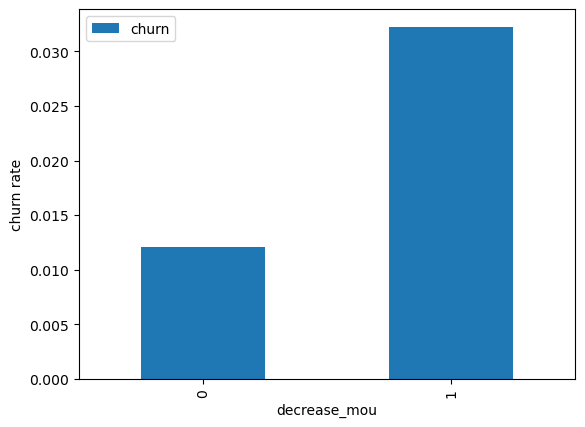

In [76]:
telecom_data_filtered.pivot_table(values='churn', index='decrease_mou', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see that the churn rate is more for the customers, whose minutes of usage(mou) decreased in the action phase than the good phase.

Churn rate on the basis whether the customer decreased her/his number of recharge in action month


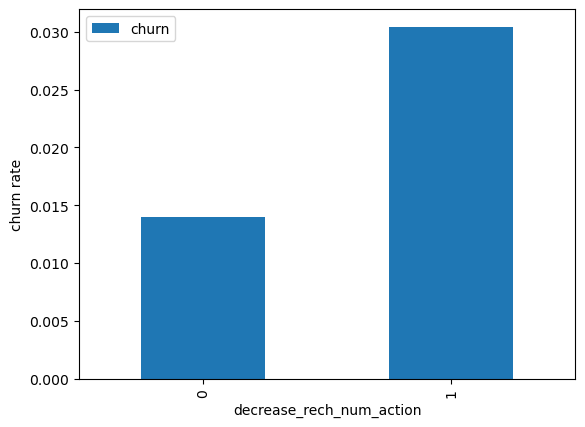

In [77]:
telecom_data_filtered.pivot_table(values='churn', index='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

As expected, the churn rate is more for the customers, whose number of recharge in the action phase is lesser than the number in good phase.

Churn rate on the basis whether the customer decreased her/his amount of recharge in action month


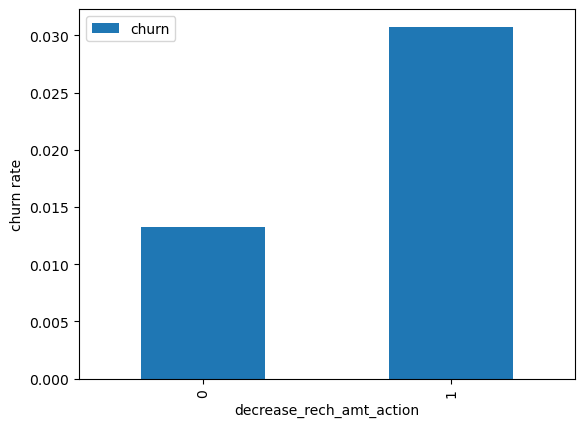

In [78]:
telecom_data_filtered.pivot_table(values='churn', index='decrease_rech_amt_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here also we see the same behaviour. The churn rate is more for the customers, whose amount of recharge in the action phase is lesser than the amount in good phase.

Churn rate on the basis whether the customer decreased her/his volume based cost in action month


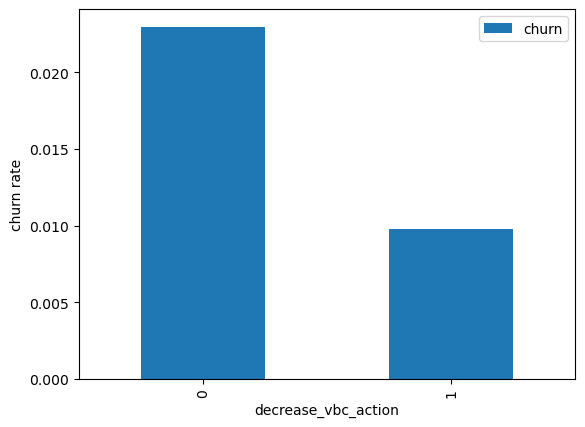

In [79]:
telecom_data_filtered.pivot_table(values='churn', index='decrease_vbc_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

Here we see the expected result. The churn rate is more for the customers, whose volume based cost in action month is increased. That means the customers do not do the monthly recharge more when they are in the action phase.

Analysis of the average revenue per customer (churn and not churn) in the action phase


In [80]:
# Creating churn dataframe
data_churn = telecom_data_filtered[telecom_data_filtered['churn'] == 1]
# Creating not churn dataframe
data_non_churn = telecom_data_filtered[telecom_data_filtered['churn'] == 0]

[Text(0.5, 0, 'Action phase ARPU')]

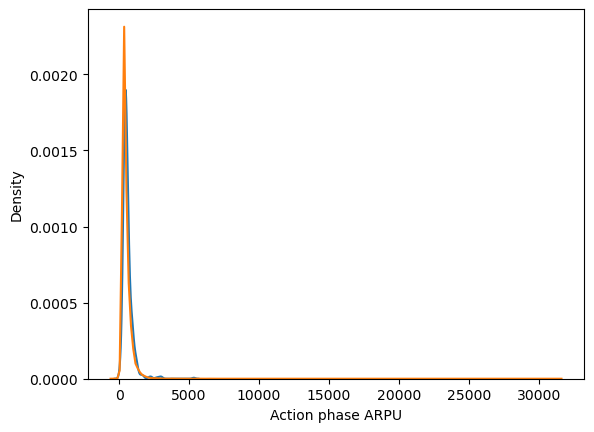

In [81]:
# Distribution plot
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

[Text(0.5, 0, 'Action phase MOU')]

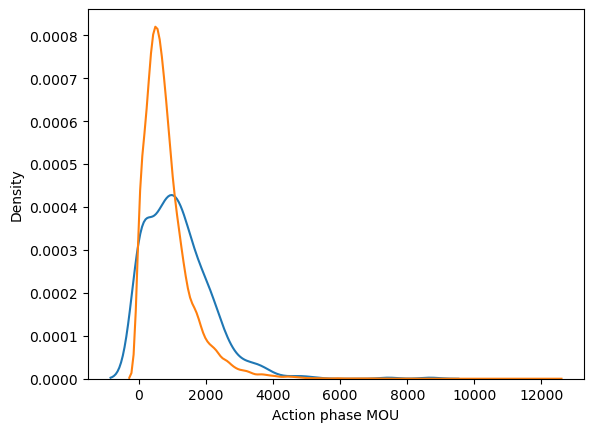

In [82]:
# Distribution plot
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

### Bivariate analysis


Analysis of churn rate by the decreasing recharge amount and number of recharge in the action phase


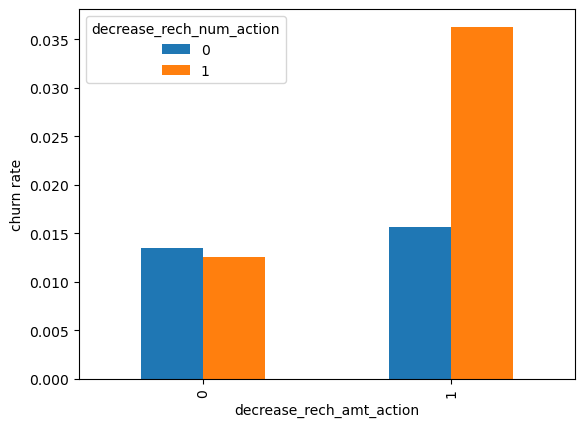

In [83]:
telecom_data_filtered.pivot_table(values='churn', index='decrease_rech_amt_action', columns='decrease_rech_num_action', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

We can see from the above plot, that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase.

Analysis of recharge amount and number of recharge in action month


#### Dropping few derived columns, which are not required in further analysis


In [84]:
data = telecom_data_filtered.drop(['total_mou_good','avg_mou','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','diff_vbc'], axis=1)

In [85]:
# Putting feature variables into X
X = data.drop(['churn'], axis=1)

In [86]:
# Putting target variable to y
y = data['churn']

In [87]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

### Dealing with data imbalance


We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [88]:
# Imporing SMOTE
from imblearn.over_sampling import SMOTE 

In [89]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)

In [90]:
# Fittign SMOTE to the train set
X_train, y_train = sm.fit_resample(X_train, y_train)

### Feature Scaling


In [91]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [92]:
# Instantiate the Scaler
scaler = StandardScaler()

In [93]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()
# Removing the derived binary columns 
cols_scale.remove('decrease_mou')
cols_scale.remove('decrease_rech_num_action')
cols_scale.remove('decrease_rech_amt_action')
cols_scale.remove('decrease_arpu_action')
cols_scale.remove('decrease_vbc_action')

In [94]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [95]:

X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,...,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,jul_vbc_3g_action,decrease_vbc_action
0,0.0,0.0,0.0,0.746353,0.947544,-0.026763,0.113603,0.273885,0.742916,-0.278397,...,0.681086,1.527054,0.680538,-0.513767,0,0,0,0,1.203567,0
1,0.0,0.0,0.0,3.427976,2.901429,-0.333239,-0.042053,0.018149,1.202208,2.033807,...,-0.974670,2.117429,2.757108,1.946406,0,1,1,1,2.645407,1
2,0.0,0.0,0.0,-0.188589,-0.190728,-0.144307,-0.221783,-0.520322,-0.429881,-0.278397,...,2.490004,-0.237589,-0.232325,-0.513767,1,1,1,1,-0.255347,0
3,0.0,0.0,0.0,-0.256876,-0.365473,-0.647972,-0.622971,-0.337039,-0.269512,-0.278397,...,-0.733327,-0.237589,-0.232325,-0.513767,1,1,1,1,-0.255347,0
4,0.0,0.0,0.0,-0.202047,0.008693,0.308655,0.622364,-0.589581,-0.531227,-0.278397,...,-0.831953,-0.237589,-0.232325,-0.513767,1,1,0,0,-0.255347,0


Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [96]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,onnet_mou_6,onnet_mou_7,offnet_mou_6,offnet_mou_7,roam_ic_mou_6,...,aon,jul_vbc_3g,jun_vbc_3g,churn_probability,decrease_mou,decrease_rech_num_action,decrease_rech_amt_action,decrease_arpu_action,jul_vbc_3g_action,decrease_vbc_action
39827,0.0,0.0,0.0,-0.131564,0.092900,-0.528745,-0.480621,-0.114581,0.089767,-0.278397,...,1.371469,-0.237589,-0.232325,-0.513767,1,1,0,0,-0.255347,0
32346,0.0,0.0,0.0,-0.739629,-0.101695,-0.680264,-0.332777,-0.654667,-0.559901,0.026089,...,-0.090517,-0.237589,-0.232325,1.946406,0,0,0,0,-0.255347,0
51061,0.0,0.0,0.0,-0.466096,-0.587465,-0.307055,-0.389156,-0.315138,-0.336467,0.425907,...,0.061483,-0.237589,-0.232325,-0.513767,0,1,1,1,-0.255347,0
36665,0.0,0.0,0.0,-0.834360,-0.238800,-0.558189,-0.474399,-0.534692,-0.130981,-0.278397,...,1.717240,-0.237589,-0.232325,-0.513767,0,0,0,0,-0.255347,0
25372,0.0,0.0,0.0,-0.523999,-0.268332,-0.395262,-0.383088,-0.626869,-0.302785,-0.278397,...,-0.760014,-0.237589,-0.232325,-0.513767,0,0,0,0,-0.255347,0


### Model with PCA

In [97]:
#Import PCA
from sklearn.decomposition import PCA

In [98]:
# Instantiate PCA
pca = PCA(random_state=42)

In [99]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [100]:
# Principal components
pca.components_

array([[ 6.00009535e-19, -3.33066907e-16, -3.33066907e-16, ...,
        -4.54510052e-03,  1.10675034e-01,  1.76870368e-02],
       [-3.16468706e-20, -1.38777878e-17,  8.67361738e-17, ...,
         1.21045631e-02, -8.17394621e-02, -1.62538196e-02],
       [ 1.51923000e-19, -1.38777878e-16,  4.16333634e-17, ...,
        -1.96642554e-02,  2.68579067e-01,  2.90114391e-02],
       ...,
       [-0.00000000e+00,  6.58948489e-01,  2.35204800e-01, ...,
        -4.16333634e-17, -7.60360036e-05,  9.32413868e-17],
       [ 0.00000000e+00,  8.14600599e-02,  1.58476883e-02, ...,
         1.66533454e-16,  8.32981289e-05,  5.63785130e-18],
       [ 9.99997133e-01, -7.73561519e-04,  2.26010157e-03, ...,
         1.85669622e-18, -1.25997622e-04,  7.33869346e-18]])

In [101]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.10577519 0.19840206 0.25903575 0.30682917 0.35353703 0.3961187
 0.43198845 0.463292   0.49106414 0.5184347  0.54405385 0.56882591
 0.59208242 0.61463762 0.63537892 0.65500204 0.67359192 0.69149854
 0.70705438 0.7223387  0.73735152 0.75219147 0.76566799 0.77837028
 0.79010213 0.80101722 0.81164065 0.8221035  0.83147883 0.84065138
 0.84957624 0.85835182 0.86665817 0.8748464  0.88276519 0.89056688
 0.89756708 0.90401096 0.90986358 0.91563185 0.92096281 0.92585786
 0.93061282 0.93522899 0.93934398 0.94324753 0.94697631 0.95060251
 0.95416337 0.9576847  0.96086498 0.96394262 0.96690895 0.96982574
 0.9726503  0.97531461 0.97793404 0.98048024 0.98290769 0.9852345
 0.98727126 0.98927787 0.99112284 0.99284168 0.99413366 0.99533412
 0.99644197 0.99744444 0.99826609 0.99880013 0.99923629 0.99956299
 0.99984291 0.99996651 0.99999839 0.99999973 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.       

Text(0, 0.5, 'Cumulative Variance')

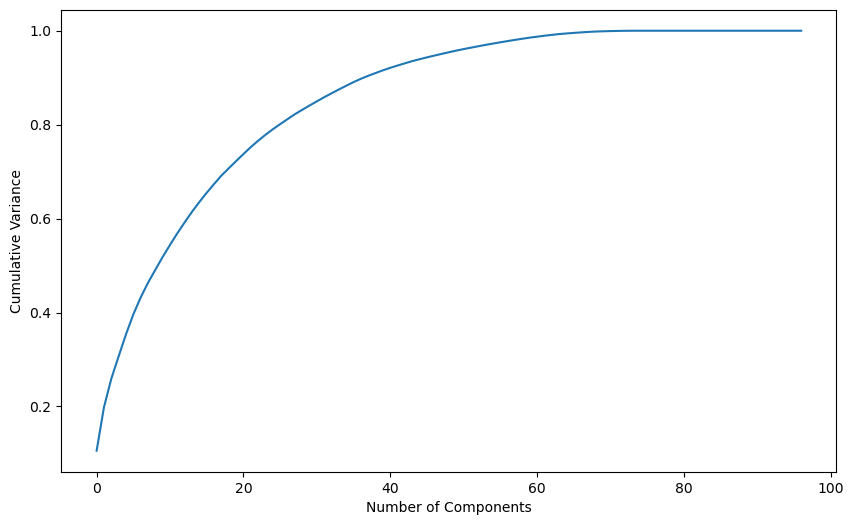

In [102]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.



In [103]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [104]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [105]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

Applying transformation on the test set
We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [106]:
X_test_pca = pca_final.transform(X_test)


### Logistic regression with PCA


In [107]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [108]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Tuning hyperparameter C


C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.



In [109]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [110]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [111]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.221536,0.017897,0.007156,0.007287,0.01,{'C': 0.01},0.896477,0.890931,0.895799,0.899225,...,0.895772,0.002694,6,0.896011,0.895568,0.897419,0.897744,0.895547,0.896458,0.000938
1,0.437339,0.016988,0.002719,0.000610,0.1,{'C': 0.1},0.897676,0.894935,0.898172,0.903218,...,0.898885,0.002783,5,0.899134,0.898586,0.899959,0.899343,0.900343,0.899473,0.000618
2,0.480037,0.046754,0.003808,0.001281,1,{'C': 1},0.899113,0.896113,0.897935,0.905332,...,0.900018,0.003198,4,0.899429,0.899947,0.899900,0.900290,0.901409,0.900195,0.000666
3,0.565935,0.024563,0.002704,0.000482,10,{'C': 10},0.899832,0.897762,0.898410,0.907212,...,0.900963,0.003391,1,0.900901,0.900775,0.900313,0.902007,0.901883,0.901176,0.000659
4,0.591559,0.054465,0.002610,0.000645,100,{'C': 100},0.899113,0.897055,0.897223,0.906037,...,0.900111,0.003311,3,0.900312,0.900953,0.900549,0.901237,0.901883,0.900987,0.000550
5,0.610126,0.050765,0.007181,0.001791,1000,{'C': 1000},0.899353,0.896584,0.897460,0.907447,...,0.900441,0.003870,2,0.899900,0.900775,0.901376,0.902599,0.902357,0.901401,0.001000


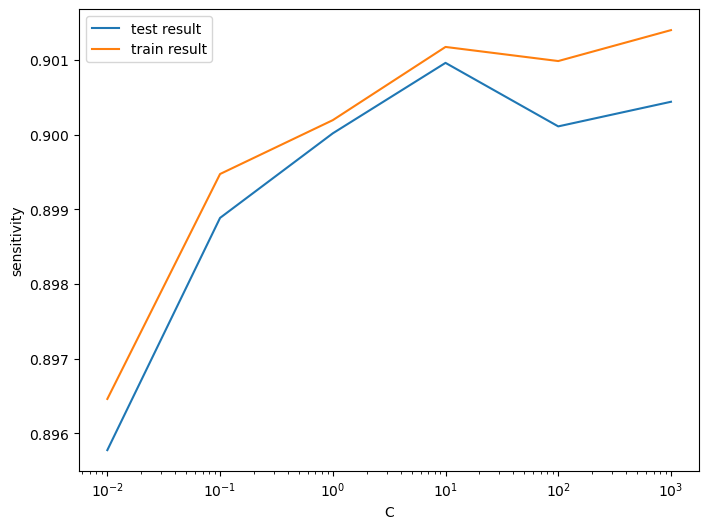

In [112]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [113]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.900962531520309 at C = 10


Logistic regression with optimal C


In [114]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [115]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

Prediction on the train set


In [116]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [117]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18614  2532]
 [ 2103 19043]]


In [118]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [119]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8904048046911945
Sensitivity:- 0.9005485671048898
Specificity:- 0.8802610422774992


In [120]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [121]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4684  603]
 [  24   92]]


In [122]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [123]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.883953359244864
Sensitivity:- 0.7931034482758621
Specificity:- 0.8859466616228485


### Decision tree with PCA


In [124]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [125]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [126]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.979717,0.018704,0.003437,0.000606,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.869236,0.773286,0.787184,0.799007,0.875384,0.820819,0.042867,5
1,0.965986,0.005624,0.002919,0.000268,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.869236,0.773286,0.787184,0.799007,0.875384,0.820819,0.042867,5
2,0.965340,0.010452,0.003085,0.000274,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.864980,0.772104,0.778435,0.788839,0.870182,0.814908,0.043369,7
3,0.967248,0.008234,0.003480,0.000431,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.864980,0.772104,0.778435,0.788839,0.870182,0.814908,0.043369,7
4,1.613633,0.018079,0.003538,0.000481,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.897612,0.918440,0.918893,0.914164,0.904942,0.910810,0.008288,1
5,1.618790,0.019402,0.003142,0.000280,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.897612,0.918203,0.918893,0.914164,0.904942,0.910763,0.008245,2
6,1.542992,0.007604,0.003450,0.000481,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.881532,0.872104,0.894538,0.891937,0.893828,0.886788,0.008711,3
7,1.541966,0.017380,0.003221,0.000289,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.881532,0.872104,0.894538,0.891937,0.893828,0.886788,0.008711,3


In [127]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.9108101943856084
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [128]:

# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

Prediction on the train set


In [129]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [130]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[18580  2566]
 [ 1289 19857]]


In [131]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [132]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9088480090797314
Sensitivity:- 0.9390428449825026
Specificity:- 0.8786531731769602


Prediction on the test set


In [133]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [134]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4538  749]
 [  42   74]]


In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8535998519341107
Sensitivity:- 0.6379310344827587
Specificity:- 0.8583317571401551
